Populating the interactive namespace from numpy and matplotlib


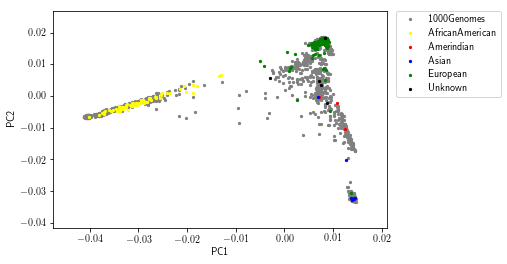

In [4]:
# Set up
%pylab inline

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths to data
MERGEDPCS = "/storage/mgymrek/gtex/genotypePCA/GTEx_1KG_merged_650.pca.evec" #Something is wrong with this file
#LABEL1000GPCS="/home/szfeupe/projects/GTEX_eSTRs/data/1k_pca_map"
#GTEXGENOMESPCS="/home/szfeupe/projects/GTEX_eSTRs/data/gtex_pca_only"
df='/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002742.v7.p2.c1.GTEx_Subject_Phenotypes.GRU.txt.gz'
race = pd.read_csv(df, compression='gzip', skiprows=10, sep='\t', quotechar='"', low_memory=False)
pca = pd.read_csv(MERGEDPCS,skiprows=0, sep='\s+')

# Output path
OUTPATH = "pdfs"
PREFIX = "SuppFigure2" 

#
COLUMN1 = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PCC"]
COLUMN2 = ["IDs","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PCC"]
LEGEND = ['AFR','AMR','EAS', 'SAS','EUR','African American','Asian','European']
COLORS = {'AMR':'slategray', 'AFR':'gray','EUR':'lightgray', 'EAS':'k', 'SAS':'lightslategrey', 
          'AfricanAmerican':'yellow', 'Asian':'blue', 'European':'green','Amerindian':'red', '1000Genomes':'grey', 'Unknown':'k'
         }

#list(set(list(race['RACE'])))
pca.columns=COLUMN1
pca = pca.fillna({'PCC':'1000Genomes'})


pca_650 = pca.loc[pca['PCC'].isnull()==False]
pca_1000 = pca.loc[pca['PCC'].isnull()==True]

#plot both with different colors (1000G in shades of gray)
#plt.title(main="PCA 1000G & GTEx")

fig, ax = plt.subplots()
grouped = pca.groupby('PCC')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', marker='.', x='PC1', y='PC2', label=key, color=COLORS[key])


plt.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0.,ncol=1)
plt.show()

In [5]:
pca.loc[pca['PCC']!='1000Genomes'].to_csv("/storage/szfeupe/Runs/GTEx_estr/gtex650.pca", sep=" ",header=None)

In [18]:
grouped.size()

PCC
1000Genomes        2275
AfricanAmerican      75
Amerindian            3
Asian                 8
European            561
Unknown               5
dtype: int64

In [36]:
Ourset = pca.loc[pca['PCC'].isin(['European','AfricanAmerican'])]
listid = Ourset['PCC']
listid.to_csv('/storage/szfeupe/Runs/650GTEx_estr/SampleRace.map', sep='\t')
T=pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/SampleRace.map', sep='\t',  header=None)
T.loc[T[0]=='GTEX-OIZF']

,0,1
377,GTEX-OIZF,European
